In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

In [52]:
def normalize(X):
    n = X.shape[0] # number of rows
    mean = np.mean(X, axis=1).reshape((n, 1)) # стовпець середніх значень для когжного елемента
    std = np.std(X, axis=1).reshape((n, 1))
    X_new = (X - mean) / std**2
    return X_new, mean, std

In [53]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [54]:
def plot_data(X, y):
    ax = plt.gca()
    ax.scatter(X[:,0], X[:,1], c=(y == 1), cmap=cm_bright)

In [55]:
def fwd_pass(X, params):
    W = params["W"]
    b = params["b"]
    
    Z = np.dot(W, X) + b
    '''
    (1, m) = (1, n) * (n, m) + (1, 1)
    W.shape = (1, n)
    '''
    A = sigmoid(Z)
    '''
    (1, m) = (1, m)
    '''
    
    cache = (W, b, Z, A)
    
    return A, cache

In [56]:
def cost(A, Y):
    m = Y.shape[1]
    L = - Y * np.log(A) - (1 - Y) * np.log(1 - A)
    '''
    (1, m) = (1, m)x(1, m) - (1, m)x(1, m)
    '''
    J = np.sum(L) / m
    '''
    (1, 1)
    '''
    
    return J

In [57]:
def bwd_pass(X, Y, cache):
    n, m = X.shape
    (W, b, Z, A) = cache
    
    dZ = A - Y
    '''
    (1, m) = (1, m) - (1, m)
    '''
    dW = (1. / m )* np.dot(X, dZ.T).reshape((1, n))
    '''
    (1, n) = ((n, m)*((1, m).T).T = ((n, m)*(m, 1)).T
    '''
    db = (1. / m )* np.sum(dZ)
    '''
    (1, 1) = sum(1, m) = (1, 1)
    '''
    
    grads = {"dW" : dW, "db" : db, "dZ" : dZ}
    return grads

In [58]:
def init_params(n, m):
    W = np.random.randn(1, n) * 0.01
    b = 0
    
    params = {"W" : W, "b" : b}
    return params

In [59]:
def update_params(params, grads, learning_rate):
    W = params["W"]
    b = params["b"]
    
    dW = grads["dW"]
    db = grads["db"]
    
    params["W"] = W - learning_rate * dW
    params["b"] = b - learning_rate * db
    
    return params

In [60]:
def fit(X, Y, learning_rate = 0.01, num_iter = 30000, debug = False):
    n, m = X.shape 
    params = init_params(n, m)
    costs = []
    for i in range(num_iter):
        A, cache = fwd_pass(X, params)
        curr_cost = cost(A, Y)
        grads = bwd_pass(X, Y, cache)
        
        params = update_params(params, grads, learning_rate)
        
        if debug and i % 10 == 0:
            print("{}-th iteration: {}".format(i, curr_cost))
            costs.append(curr_cost)
    
    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("Iteration, *10")
    plt.show()
    
    return params    

In [61]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
df = pd.read_csv("sats.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(100, 2), y=(100,)


In [72]:
data_columns = ["test1", "test2"]
target_column = "passed"
df = pd.read_csv("tests.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(118, 2), y=(118,)


In [38]:
data_columns = ["test1", "test2", "test1test1", "test2test2", "test1test2", "test1test1test1", "test2test2test2"]
target_column = "passed"
df = pd.read_csv("testsCom.csv")
X, Y = df[data_columns].values, df[target_column]
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(118, 7), y=(118,)


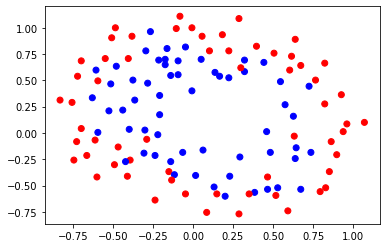

In [73]:
plot_data(X, Y)

In [74]:
Y = Y.values.reshape((df.shape[0], 1))

In [75]:
X, Y = X.T, Y.T

In [76]:
X, mean, std = normalize(X)

In [77]:
X[:,:5]

array([[ 1.68141369,  1.09259541, -3.31170484, -0.65026746, -1.89855732],
       [-2.68411121,  1.49153719,  0.39985465,  3.01989275, -2.22014613]])

In [78]:
Y.shape

(1, 118)

In [79]:
mean

array([[0.05477891],
       [0.18310156]])

In [80]:
std

array([[0.49454485],
       [0.51753592]])

0-th iteration: 0.6929021320922326
10-th iteration: 0.6906082306337623
20-th iteration: 0.6903282887391526
30-th iteration: 0.6902777870531364
40-th iteration: 0.6902611802276567
50-th iteration: 0.6902529430491163
60-th iteration: 0.6902482202627229
70-th iteration: 0.6902454049555261
80-th iteration: 0.690243709621891
90-th iteration: 0.6902426859313365
100-th iteration: 0.6902420673274013
110-th iteration: 0.6902416934303052
120-th iteration: 0.6902414674241187
130-th iteration: 0.6902413308092329
140-th iteration: 0.6902412482283818
150-th iteration: 0.6902411983097765
160-th iteration: 0.6902411681348245
170-th iteration: 0.690241149894546
180-th iteration: 0.6902411388685736
190-th iteration: 0.6902411322035339
200-th iteration: 0.690241128174611
210-th iteration: 0.690241125739183
220-th iteration: 0.6902411242669992
230-th iteration: 0.6902411233770838
240-th iteration: 0.6902411228391416


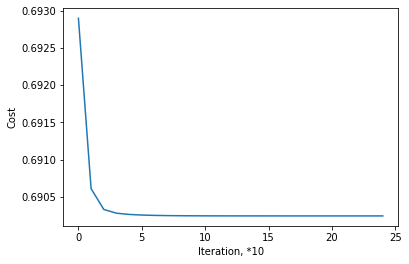

In [81]:
params = fit(X, Y, learning_rate = 0.1, num_iter = 250, debug = True)

In [82]:
print(params)

{'W': array([[-0.07423342, -0.00485648]]), 'b': -0.034067398758758166}
